In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# p-chart

- Quality Toolbox (2e) - Nancy R. Tague
- https://en.wikipedia.org/wiki/P-chart (last accessed: 28 March 2020)
- https://www.youtube.com/watch?v=LSd-1CJQbs8 (last accessed: 28 March 2020)
- https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/control-charts/how-to/attribute-control-charts/p-chart/methods-and-formulas/methods-and-formulas/#plotted-points (last accessed: 19 April 2020)

Number of defectives for subgroup $i$: $x_{i}$

Number of values in subgroup $i$: $n_{i}$

Process proportion: $p$

Central line: $\mu = \bar{p} = \dfrac{\Sigma x_{i}}{\Sigma n_{i}}$ (if not specified)

Standard deviation: $\sigma = \sqrt{\dfrac{p(1-p)}{n_{i}}}$

Upper control line: $UCL_{p} = p + 3\cdot\sqrt{\dfrac{p(1-p)}{n_{i}}}$

Lower control line: $LCL_{p} = p - 3\cdot\sqrt{\dfrac{p(1-p)}{n_{i}}}$

Plotted statistics: $p_{i} = \frac{x_{i}}{n_{i}}$

Description:

The p chart is an attribute control chart used to study the proportion (fraction or percentage) of nonconforming or defective items. Often, information about the types of nonconformities is collected on the same chart to help determine the causes of variation.

Also called: proportion chart

In [2]:
def read_data(path):
    return pd.read_csv(path)

# Read the data
path = r'data\pchart_data.csv'
pdata = read_data(path)
pdata.head()

,Hour,Sample size,Defective samples
0,1,100,1
1,2,100,0
2,3,50,3
3,4,50,2
4,5,75,4


In [3]:
# Clean data
del pdata['Hour']
pdata.head()

,Sample size,Defective samples
0,100,1
1,100,0
2,50,3
3,50,2
4,75,4


In [4]:
# Compute the proportion of defectives for one subgroup
def plotted_statistics(num_defectives, num_samples):
    return num_defectives / num_samples

pdata['Proportion'] = plotted_statistics(pdata['Defective samples'], pdata['Sample size'])
pdata.head()

,Sample size,Defective samples,Proportion
0,100,1,0.010000
1,100,0,0.000000
2,50,3,0.060000
3,50,2,0.040000
4,75,4,0.053333


In [5]:
def compute_parameters(num_defectives, num_samples, p=None):
    # Compute the center line p_bar
    if p is None:
        p = num_defectives.sum() / num_samples.sum()
    
    # Compute standard deviation
    std = np.sqrt((p*(1-p))/num_samples)
    
    # Compute one sigma limit
    one_sigma_up = p + std
    one_sigma_up = np.minimum(one_sigma_up, 1)
    
    one_sigma_low = p - std
    one_sigma_low = np.maximum(one_sigma_low, 0)
    
    # Compute two sigma limit
    two_sigma_up = p + 2*std
    two_sigma_up = np.minimum(two_sigma_up, 1)
    
    two_sigma_low = p - 2*std
    two_sigma_low = np.maximum(two_sigma_low, 0)
    
    # Compute the upper and lower control limit
    ucl = p + 3*std
    ucl = np.minimum(ucl, 1)
    ucl_mean = ucl.mean()
    
    lcl = p - 3*std
    lcl = np.maximum(lcl, 0)
    lcl_mean = lcl.mean()
    
    return p, one_sigma_up, one_sigma_low, two_sigma_up, two_sigma_low, ucl, lcl, ucl_mean, lcl_mean
    
p, one_sigma_up, one_sigma_low, two_sigma_up, two_sigma_low, ucl, lcl, ucl_mean, lcl_mean = compute_parameters(pdata['Defective samples'], pdata['Sample size'], p=0.02)
pbar, one_sigma_upbar, one_sigma_lowbar, two_sigma_upbar, two_sigma_lowbar, uclbar, lclbar, uclbar_mean, lclbar_mean = compute_parameters(pdata['Defective samples'], pdata['Sample size'])

print(f'p: {p:.4f}')
print(f'Lower control limit:\n{lcl}')
print(f'Upper control limit:\n{ucl}')
print(f'Mean of lower control limit:{lcl_mean:.4f}')
print(f'Mean of upper control limit:{ucl_mean:.4f}')
print('\n\n')
print(f'pbar: {pbar:.4f}')
print(f'Lower control limit:\n{lclbar}')
print(f'Upper control limit:\n{uclbar}')
print(f'Mean of lower control limit:{lclbar_mean:.4f}')
print(f'Mean of upper control limit:{uclbar_mean:.4f}')

p: 0.0200
Lower control limit:
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
Name: Sample size, dtype: float64
Upper control limit:
0     0.062000
1     0.062000
2     0.079397
3     0.079397
4     0.068497
5     0.079397
6     0.062000
7     0.062000
8     0.062000
9     0.062000
10    0.062000
11    0.062000
12    0.062000
13    0.062000
14    0.079397
15    0.079397
16    0.054293
17    0.062000
18    0.062000
19    0.079397
20    0.079397
21    0.062000
22    0.062000
23    0.062000
Name: Sample size, dtype: float64
Mean of lower control limit:0.0000
Mean of upper control limit:0.0670



pbar: 0.0289
Lower control limit:
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17 

In [6]:
# Plot the p-chart
def plot_pchart(x_axis, y_axis, mu, one_sigma_up, one_sigma_low, two_sigma_up, two_sigma_low, ucl, lcl, ucl_mean, lcl_mean, title, x_label, y_label):
    plt.style.use('seaborn')
    fig, ax = plt.subplots()

    ax.plot(x_axis, y_axis, 'o-', c='red')
    
    mu_line = mu*np.ones(x_axis.size)
    ax.plot(mu_line, c='yellow', label=f'Central line={mu:.4f}')
    
    one_sigma_line_up = one_sigma_up*np.ones(x_axis.size)
    ax.plot(one_sigma_line_up, c='black', label=f'$\mu$+$\sigma$')
    
    two_sigma_line_up = two_sigma_up*np.ones(x_axis.size)
    ax.plot(two_sigma_line_up, c='black', label=f'$\mu$+2$\sigma$')
    
    one_sigma_line_low = one_sigma_low*np.ones(x_axis.size)
    ax.plot(one_sigma_line_low, c='orange', label=f'$\mu$-$\sigma$')
    
    two_sigma_line_low = two_sigma_low*np.ones(x_axis.size)
    ax.plot(two_sigma_line_low, c='orange', label=f'$\mu$-2$\sigma$')

    ucl_line = ucl*np.ones(x_axis.size)
    ax.plot(ucl_line, c='green', label=f'Upper control limit={ucl_mean:.4f}')

    lcl_line = lcl*np.ones(x_axis.size)
    ax.plot(lcl_line, c='blue', label=f'Lower control limit={lcl_mean:.4f}')

    ax.set_xticks(np.arange(x_axis.size))
    
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    ax.set_title(title, fontsize=25)
    
    ax.set_xlabel(x_label, fontsize=15)
    
    ax.set_ylabel(y_label, fontsize=15)

C:\Users\PC\AppData\Local\Temp\ipykernel_2592\1584513875.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


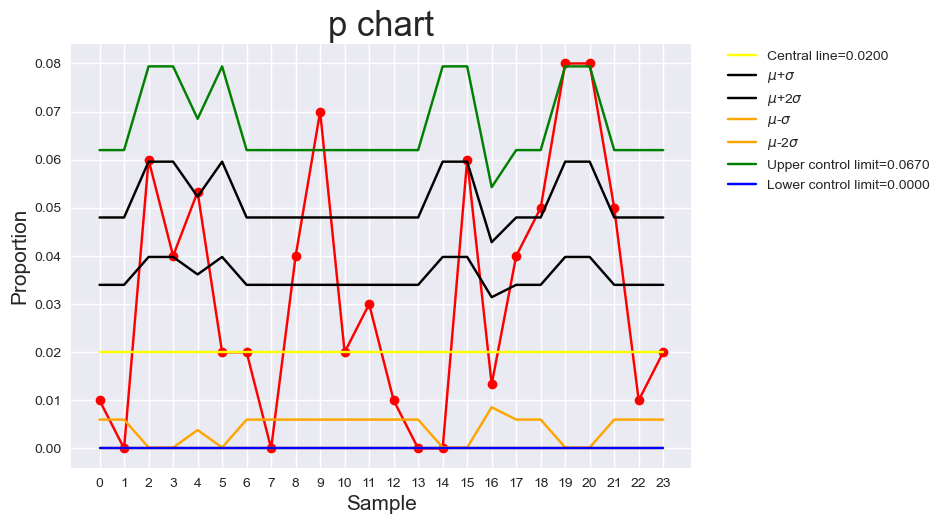

In [7]:
# With predefined p-value
plot_pchart(x_axis=pdata.index, y_axis=pdata['Proportion'], mu=p, one_sigma_up=one_sigma_up, one_sigma_low=one_sigma_low, two_sigma_up=two_sigma_up, two_sigma_low=two_sigma_low, ucl=ucl, lcl=lcl, ucl_mean=ucl_mean, lcl_mean=lcl_mean, title=r'p chart', x_label=r'Sample', y_label='Proportion')

p control chart generated in Minitab 17 for comparison:

<img src="minitab\pchart_predefined.png" width="500" height="500" align="center"/>

**Analysis**:
- The code is correct; the chart is correctly reproduced.
- Three points more than 3.00 standard deviations from center line. Test Failed at points:  10, 20, 21. The process is out of statistical control.

C:\Users\PC\AppData\Local\Temp\ipykernel_2592\1584513875.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


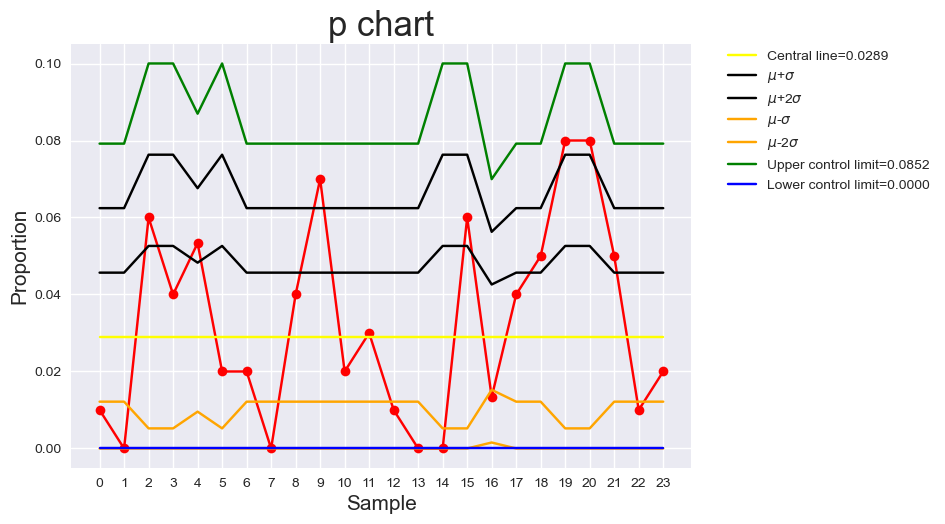

In [8]:
# Without predefined p-value
plot_pchart(x_axis=pdata.index, y_axis=pdata['Proportion'], mu=pbar, one_sigma_up=one_sigma_upbar, one_sigma_low=one_sigma_lowbar, two_sigma_up=two_sigma_upbar, two_sigma_low=two_sigma_lowbar, ucl=uclbar, lcl=lclbar, ucl_mean=uclbar_mean, lcl_mean=lclbar_mean, title=r'p chart', x_label=r'Sample', y_label='Proportion')

p control chart generated in Minitab 17 for comparison:

<img src="minitab\pchart.png" width="500" height="500" align="center"/>

**Analysis**:
- The code is correct; the chart is correctly reproduced.
- There are no points beyond the control limits, and there is no unwanted pattern. The process is in statistical control.